# Classification Project

## File IO

Only File IO...

You may not change this code.

In [1]:
from tkinter.filedialog import askopenfilename
import pandas as pd
import tkinter
import os

tk_window = tkinter.Tk()
cwd = os.getcwd()

tr_data = pd.read_csv(askopenfilename(title='Choose your training data'))

tr_ans = pd.read_csv(askopenfilename(title='Choose your training answer'))

tr_ans = tr_ans.iloc[:, 0]

ts_data = pd.read_csv(askopenfilename(title='Choose your test data'))

tk_window.destroy()

## Predict Algorithm

Type your source code (Champion Algorithm)

In [4]:
#smartphone
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42,class_weight= 'balanced'  )
logreg.fit(tr_data, tr_ans)

#,solver='newton-cg'
y_pred = logreg.predict(ts_data)

pred_df = pd.DataFrame(y_pred)

pred_df.to_csv("output.csv", mode='w')

C:\Users\wlgns\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\wlgns\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

#Gradient Boosting Regression
GBoost = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,
                                  max_depth=4,
                                   random_state=42, criterion= 'mse')
#max_features='sqrt'  min_samples_leaf=15,min_samples_split=10,
GBoost.fit(tr_data, tr_ans)

y_pred=GBoost.predict(ts_data)
pred_df = pd.DataFrame(y_pred)

pred_df.to_csv("output.csv", mode='w')

## Check Accuracy

Only for check accuracy

In [5]:
def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

tk_window = tkinter.Tk()
cwd = os.getcwd()
ts_ans = pd.read_csv(askopenfilename(title='Choose your test answer'))
ts_ans = ts_ans.iloc[:, 0]
tk_window.destroy()

print(accuracy(ts_ans, y_pred))

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(accuracy(ts_ans, y_pred))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(ts_ans, y_pred)))

0.9873725109276348
0.9873725109276348
Confusion Matrix:
[[420   0   0   0   0   0]
 [  0 322  20   0   0   0]
 [  0   3 375   0   0   0]
 [  0   0   0 316   1   1]
 [  0   0   0   0 280   0]
 [  0   0   0   1   0 320]]



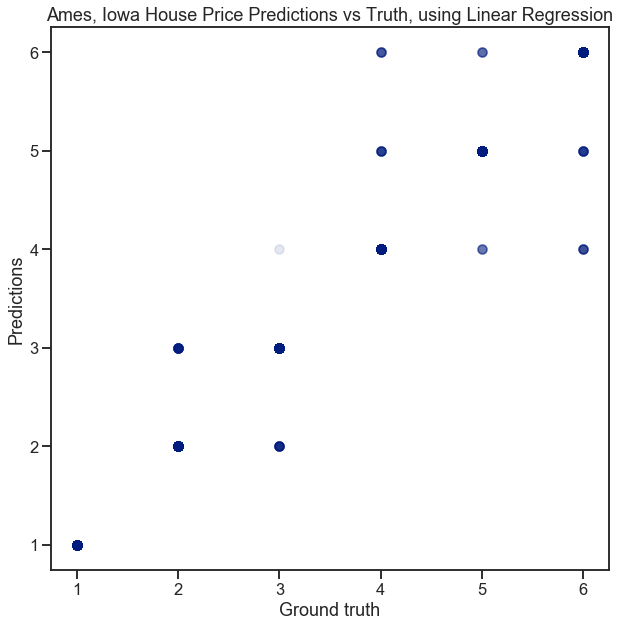

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,10))
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(ts_ans, y_pred, alpha=.1)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');

In [ ]:
k_range = list(range(100,1000, 3))
scores = []
for k in k_range:
    #knn = KNeighborsClassifier(n_neighbors=k)
    #knn.fit(X_train, y_train)
    #y_pred = knn.predict(X_test)
    ABC = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
    learning_rate=0.1, n_estimators=k)
    ABC.fit(tr_data, tr_ans)
    y_pred=ABC.predict(ts_data)
    pred_df = pd.DataFrame(y_pred)
    scores.append(accuracy(ts_ans, y_pred))
    print(accuracy(ts_ans, y_pred), k)
    
#1003
plt.plot(k_range, scores)
plt.xlabel('Value of k for model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of model')
plt.show()

0.9373482272948033 100
0.9378338999514327 103
0.932491500728509 106
0.9378338999514327 109
0.9402622632345798 112
0.9373482272948033 115
0.9378338999514327 118
0.9368625546381739 121
0.935891209324915 124
0.9344341913550267 127
0.9368625546381739 130
0.9349198640116562 133
0.9349198640116562 136
0.9363768819815445 139
0.9397765905779505 142
0.935891209324915 145
0.9378338999514327 148
0.9354055366682856 151
0.9363768819815445 154
0.9363768819815445 157
0.9402622632345798 160
0.9373482272948033 163
0.9378338999514327 166
0.9368625546381739 169
0.9354055366682856 172
0.939290917921321 175
0.9388052452646916 178
0.9349198640116562 181
0.9305488101019913 184
0.9383195726080622 187
